# FFT X^2 MANUALNE POCITANA CEZ INTEGRALY

(0.05067729517481354-8.881784197001253e-17j)
(-0.06256064324584676-8.881784197001253e-17j)
(0.07917387688481359+2.664535259100376e-16j)
(-0.10340566456903494+1.7763568394002506e-16j)
(0.1407405674091481+0j)
(-0.20265906816053905+4.440892098500626e-16j)
(0.31664539946087467-1.7763568394002506e-16j)
(-0.5629121650270001-3.552713678800501e-16j)
(1.266531495711411+3.552713678800501e-16j)
(-5.0660758821999865+0j)
(8.333350033383402+0j)
(-5.0660758821999865+0j)
(1.266531495711411-3.552713678800501e-16j)
(-0.5629121650270001+3.552713678800501e-16j)
(0.31664539946087467+1.7763568394002506e-16j)
(-0.20265906816053905-4.440892098500626e-16j)
(0.1407405674091481+0j)
(-0.10340566456903494-1.7763568394002506e-16j)
(0.07917387688481359-2.664535259100376e-16j)
(-0.06256064324584676+8.881784197001253e-17j)
(0.05067729517481354+8.881784197001253e-17j)


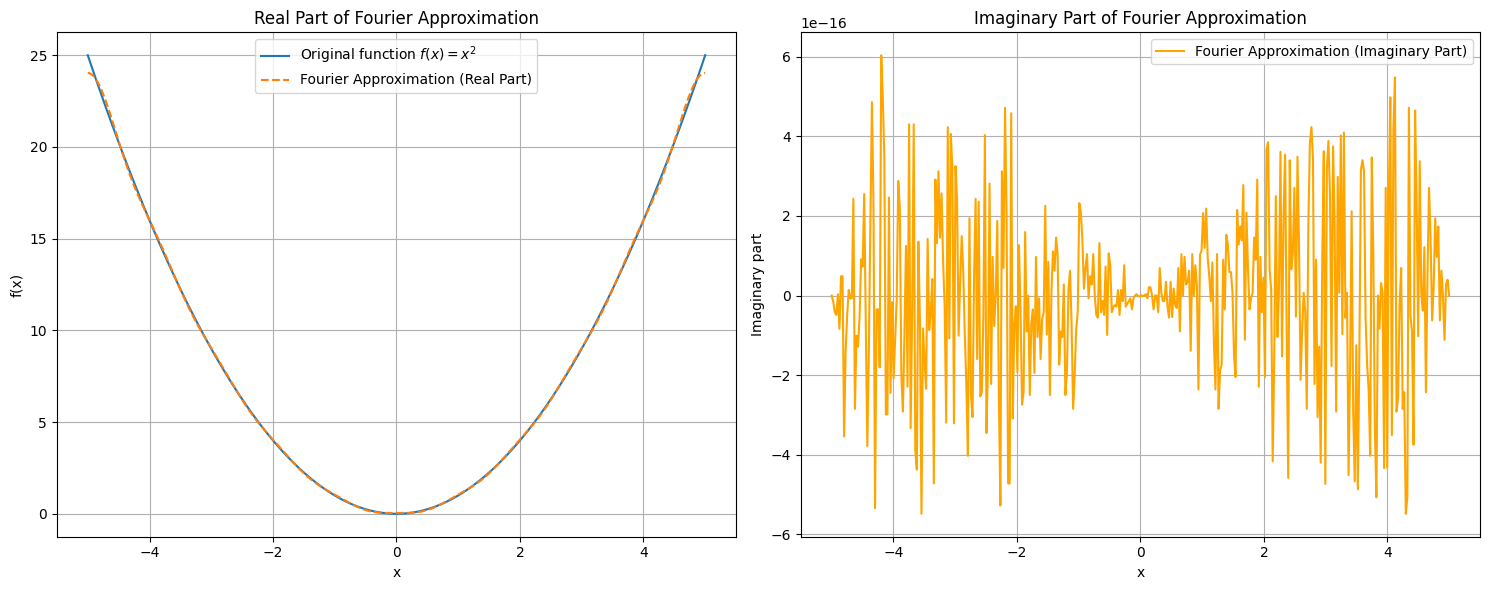

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the complex Fourier coefficients
def fourier_coefficient(f, n, L):
    integral = np.trapz([f(x) * np.exp(-1j * n * np.pi * x / L) for x in np.linspace(-L, L, 1000)], np.linspace(-L, L, 1000))
    return integral / (2 * L)

# Modifying the fourier_approximation function to also return the imaginary part
def fourier_approximation_complex(x, N, L):
    f = lambda x: x**2
    approximation = 0
    for n in range(-N, N+1):
        cn = fourier_coefficient(f, n, L)
        print(cn)
        approximation += cn * np.exp(1j * n * np.pi * x / L)
    return approximation.real, approximation.imag

# Compute Fourier approximation (both real and imaginary parts)
fourier_values_real, fourier_values_imag = fourier_approximation_complex(x_values, N, L)

# Plotting the results, including the imaginary part
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, x_values**2, label='Original function $f(x) = x^2$')
plt.plot(x_values, fourier_values_real, label='Fourier Approximation (Real Part)', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Real Part of Fourier Approximation')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values, fourier_values_imag, label='Fourier Approximation (Imaginary Part)', color='orange')
plt.xlabel('x')
plt.ylabel('Imaginary part')
plt.title('Imaginary Part of Fourier Approximation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# FFT SCIPY KYVADLA

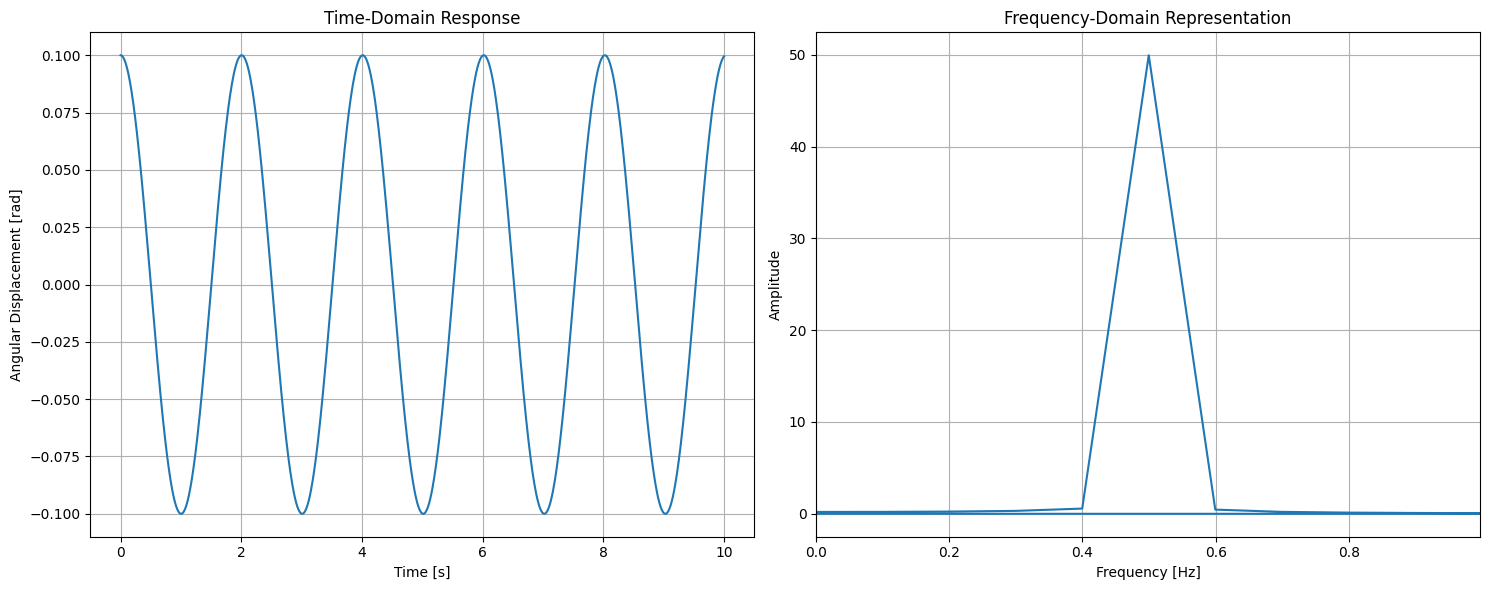

In [6]:
from scipy.integrate import odeint
from scipy.fft import fft
from scipy.fftpack import fftfreq

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of the pendulum (m)
omega_n = np.sqrt(g / L)  # Natural frequency of the pendulum

# Differential equation for the simple pendulum (small angle approximation)
def pendulum_equation(theta, t):
    dtheta_dt = theta[1]
    domega_dt = -omega_n**2 * theta[0]
    return [dtheta_dt, domega_dt]

# Initial conditions: small initial displacement, no initial velocity
theta0 = [0.1, 0]  # Initial condition [initial angle, initial angular velocity]

# Time vector
t = np.linspace(0, 10, 1000)  # 10 seconds, 1000 points

# Solving the differential equation
solution = odeint(pendulum_equation, theta0, t)
theta = solution[:, 0]

# Fourier Transform
theta_fft = fft(theta)
theta_freq = fftfreq(theta.size, d=t[1]-t[0])

# Plotting
plt.figure(figsize=(15, 6))

# Time-domain response
plt.subplot(1, 2, 1)
plt.plot(t, theta)
plt.xlabel('Time [s]')
plt.ylabel('Angular Displacement [rad]')
plt.title('Time-Domain Response')
plt.grid(True)

# Frequency-domain representation
plt.subplot(1, 2, 2)
plt.plot(theta_freq, np.abs(theta_fft))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Frequency-Domain Representation')
plt.xlim(0, 2*omega_n/(2*np.pi))  # Display up to twice the natural frequency
plt.grid(True)

plt.tight_layout()
plt.show()


# SIMULACIA KYVADLA

In [1]:
import numpy as np
import matplotlib
%matplotlib qt
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants for the pendulum
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of the pendulum (m)

# Pendulum dynamics function
def pendulum_position(t, L, theta0):
    omega = np.sqrt(g / L)
    return theta0 * np.cos(omega * t)

# Initial conditions
theta0 = 0.8  # Initial angular displacement in radians

# Time array
t = np.linspace(0, 10, 1000)  # 10 seconds

# Creating the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-L, L)
ax.set_ylim(-1.5*L, 1.5*L)
line, = ax.plot([], [], 'o-', lw=2)

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Animation update function
def update(frame):
    x = L * np.sin(pendulum_position(t[frame], L, theta0))
    y = -L * np.cos(pendulum_position(t[frame], L, theta0))
    line.set_data([0, x], [0, y])
    return line,

# Creating the animation
ani = FuncAnimation(fig, update, frames=range(len(t)), init_func=init, blit=True, interval=10)

plt.show()


# REKONSTRUKCIA POVODNEHO SIGNALU Z FFT

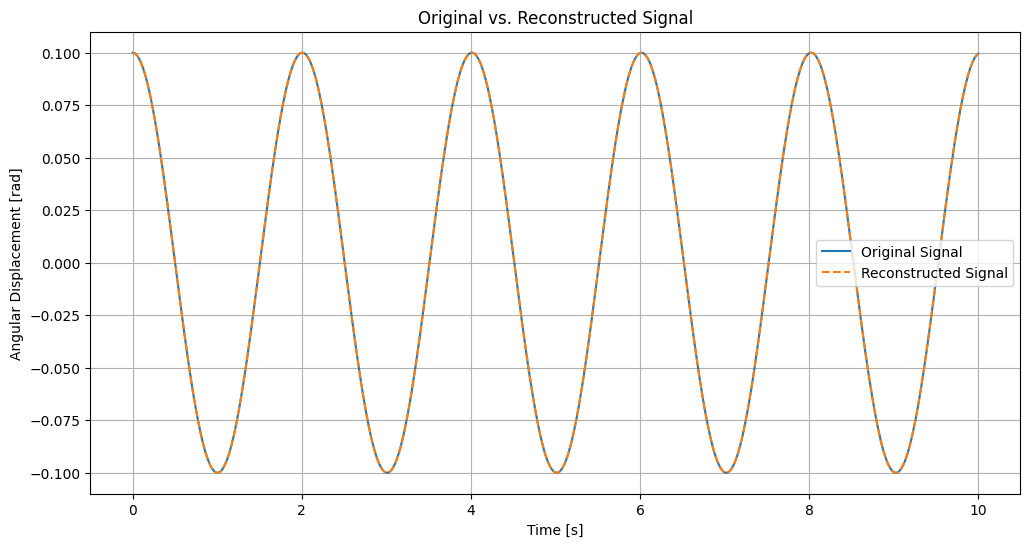

In [7]:
from scipy.fft import ifft

# Inverse Fourier Transform to reconstruct the signal
theta_reconstructed = ifft(theta_fft)

# Plotting the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(t, theta, label='Original Signal')
plt.plot(t, theta_reconstructed.real, label='Reconstructed Signal', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Angular Displacement [rad]')
plt.title('Original vs. Reconstructed Signal')
plt.legend()
plt.grid(True)
plt.show()


# KYVADLO VEKTOROVE POLE

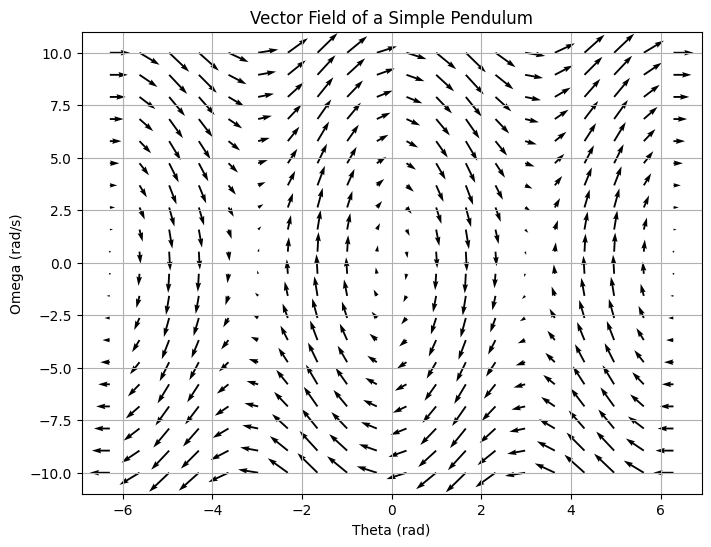

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for a simple pendulum
g = 9.81  # acceleration due to gravity, in m/s^2
L = 1.0   # length of the pendulum, in meters

# Function to compute the derivatives of theta and omega
def pendulum_derivatives(theta, omega):
    # d(theta)/dt = omega
    # d(omega)/dt = -(g/L) * sin(theta)
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return dtheta_dt, domega_dt

# Creating a grid of theta and omega values
theta_values = np.linspace(-2*np.pi, 2*np.pi, 20)
omega_values = np.linspace(-10, 10, 20)
theta, omega = np.meshgrid(theta_values, omega_values)

# Calculating the derivatives at each grid point
dtheta, domega = pendulum_derivatives(theta, omega)

# Plotting the vector field
plt.figure(figsize=(8, 6))
plt.quiver(theta, omega, dtheta, domega)
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title('Vector Field of a Simple Pendulum')
plt.grid()
plt.show()


# KYVADLO S ODPOROM

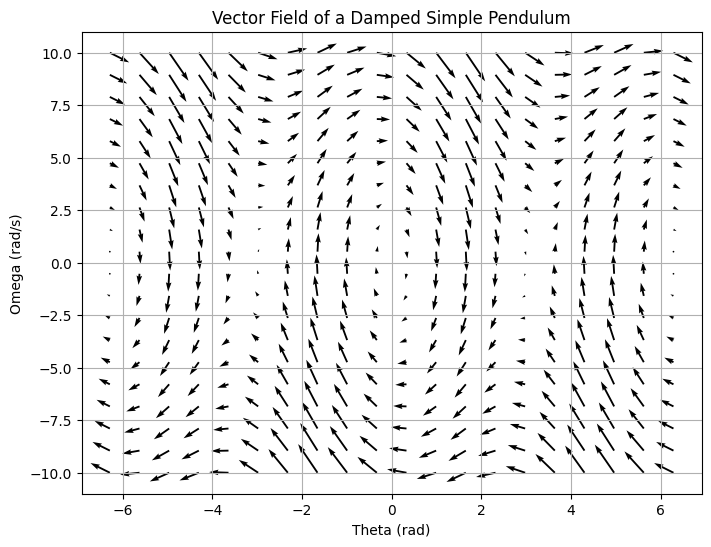

In [17]:
b = 0.5  # Damping coefficient

# Modify the pendulum_derivatives function to include the effect of friction
def pendulum_derivatives_with_friction(theta, omega):
    # d(theta)/dt = omega
    # d(omega)/dt = -(g/L) * sin(theta) - b * omega
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta) - b * omega
    return dtheta_dt, domega_dt

# Calculating the derivatives with friction at each grid point
dtheta_friction, domega_friction = pendulum_derivatives_with_friction(theta, omega)

# Plotting the vector field with friction
plt.figure(figsize=(8, 6))
plt.quiver(theta, omega, dtheta_friction, domega_friction)
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title('Vector Field of a Damped Simple Pendulum')
plt.grid()
plt.show()

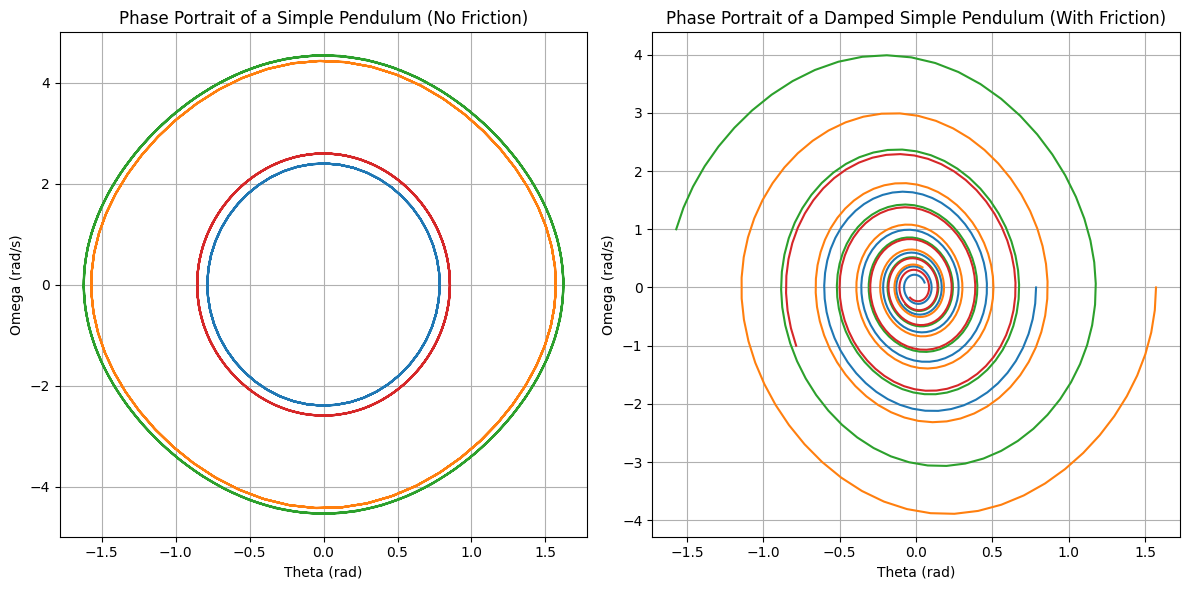

In [19]:
# To better visualize the difference, we can plot phase portraits for both the undamped and damped systems.
# A phase portrait shows the trajectories of the system in the Theta-Omega space.

# Time array for integration
t = np.linspace(0, 10, 250)

# Function for integrating the pendulum's motion
from scipy.integrate import odeint

# Pendulum without friction
def pendulum_no_friction(state, t):
    theta, omega = state
    return [omega, -(g / L) * np.sin(theta)]

# Pendulum with friction
def pendulum_with_friction(state, t):
    theta, omega = state
    return [omega, -(g / L) * np.sin(theta) - b * omega]

# Initial conditions: [initial angle, initial angular velocity]
initial_conditions = [[np.pi / 4, 0], [np.pi / 2, 0], [-np.pi / 2, 1], [-np.pi / 4, -1]]

plt.figure(figsize=(12, 6))

# Plotting phase portrait for the pendulum without friction
plt.subplot(1, 2, 1)
for theta0, omega0 in initial_conditions:
    state = odeint(pendulum_no_friction, [theta0, omega0], t)
    plt.plot(state[:, 0], state[:, 1])
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title('Phase Portrait of a Simple Pendulum (No Friction)')
plt.grid()

# Plotting phase portrait for the pendulum with friction
plt.subplot(1, 2, 2)
for theta0, omega0 in initial_conditions:
    state = odeint(pendulum_with_friction, [theta0, omega0], t)
    plt.plot(state[:, 0], state[:, 1])
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title('Phase Portrait of a Damped Simple Pendulum (With Friction)')
plt.grid()

plt.tight_layout()
plt.show()


# LAPLACE transformacia

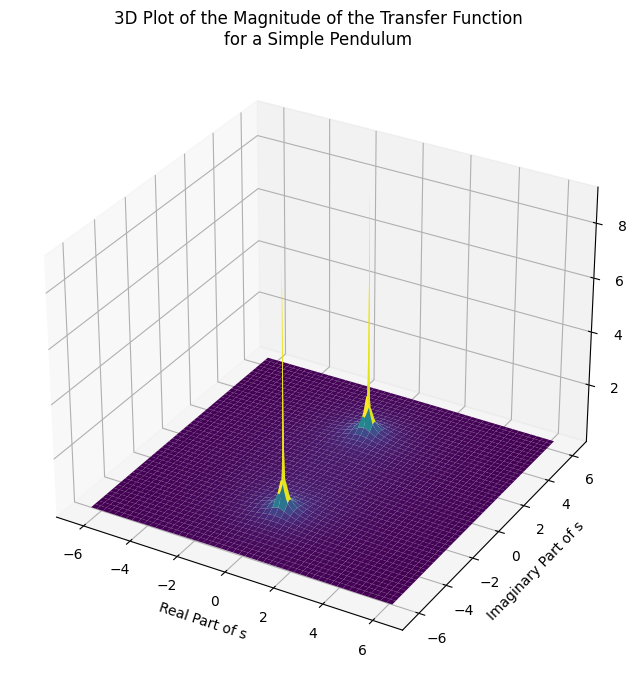

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Range of values for the real and imaginary parts of 's'
real = np.linspace(-2*omega_n, 2*omega_n, 400)
imag = np.linspace(-2*omega_n, 2*omega_n, 400)
real, imag = np.meshgrid(real, imag)

# Complex frequency variable 's'
s = real + 1j * imag

# Transfer function magnitude |1 / (s^2 + omega_n^2)|
magnitude = 1 / np.abs(s**2 + omega_n**2)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(real, imag, magnitude, cmap='viridis')

ax.set_xlabel('Real Part of s')
ax.set_ylabel('Imaginary Part of s')
ax.set_zlabel('|Transfer Function|')

ax.set_title('3D Plot of the Magnitude of the Transfer Function\nfor a Simple Pendulum')
plt.show()


# REALNA A IMAGINARNA CAST FFT (IMAGINARNA CAST JE 0 PRI REAL-VALUED SIGNALOCH)

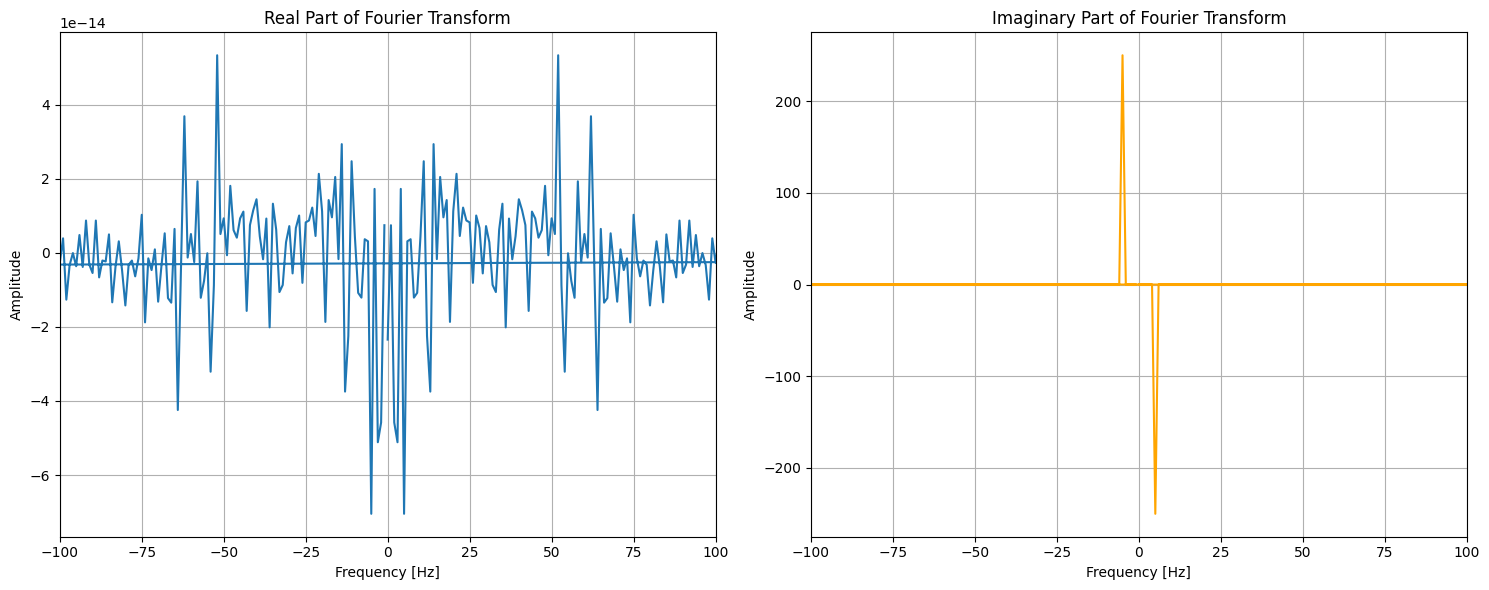

In [8]:
# Generating a sine wave signal
T = 1.0         # Total time
N = 500         # Number of points
t = np.linspace(0, T, N, endpoint=False)
freq = 5        # Frequency of the sine wave
sine_wave = np.sin(2 * np.pi * freq * t)

# Fourier Transform of the sine wave
sine_wave_fft = fft(sine_wave)
sine_wave_freq = fftfreq(N, T/N)

# Plotting
plt.figure(figsize=(15, 6))

# Real Part
plt.subplot(1, 2, 1)
plt.plot(sine_wave_freq, sine_wave_fft.real, label='Real Part')
plt.title('Real Part of Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-100, 100)  # Limiting frequency range for better visibility

# Imaginary Part
plt.subplot(1, 2, 2)
plt.plot(sine_wave_freq, sine_wave_fft.imag, label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-100, 100)  # Limiting frequency range for better visibility

plt.tight_layout()
plt.show()


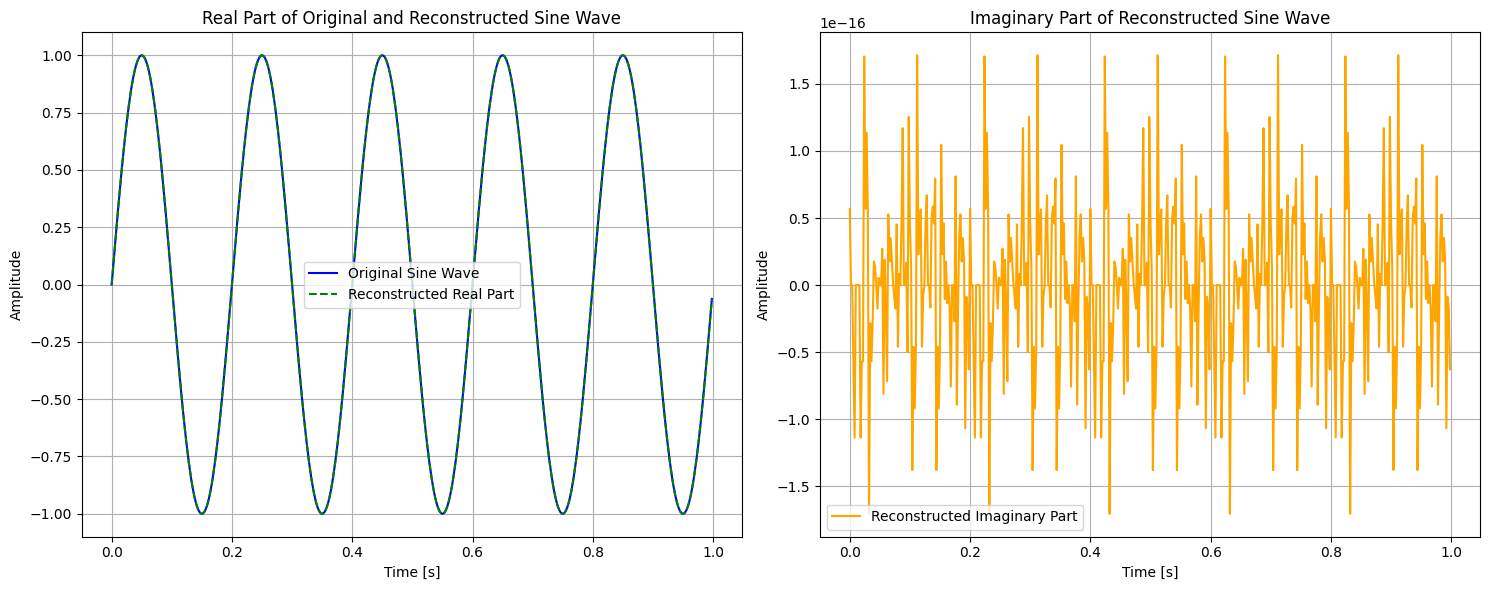

In [9]:
# Inverse Fourier Transform to reconstruct the sine wave
sine_wave_reconstructed = ifft(sine_wave_fft)

# Plotting the original and reconstructed sine wave (real and imaginary parts)
plt.figure(figsize=(15, 6))

# Real Part
plt.subplot(1, 2, 1)
plt.plot(t, sine_wave, label='Original Sine Wave', color='blue')
plt.plot(t, sine_wave_reconstructed.real, label='Reconstructed Real Part', linestyle='--', color='green')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Real Part of Original and Reconstructed Sine Wave')
plt.legend()
plt.grid(True)

# Imaginary Part
plt.subplot(1, 2, 2)
plt.plot(t, sine_wave_reconstructed.imag, label='Reconstructed Imaginary Part', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Imaginary Part of Reconstructed Sine Wave')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# FFT PRI COMPLEXNOM SIGNALE (IMAGINARNA CAST JE NENULOVA)

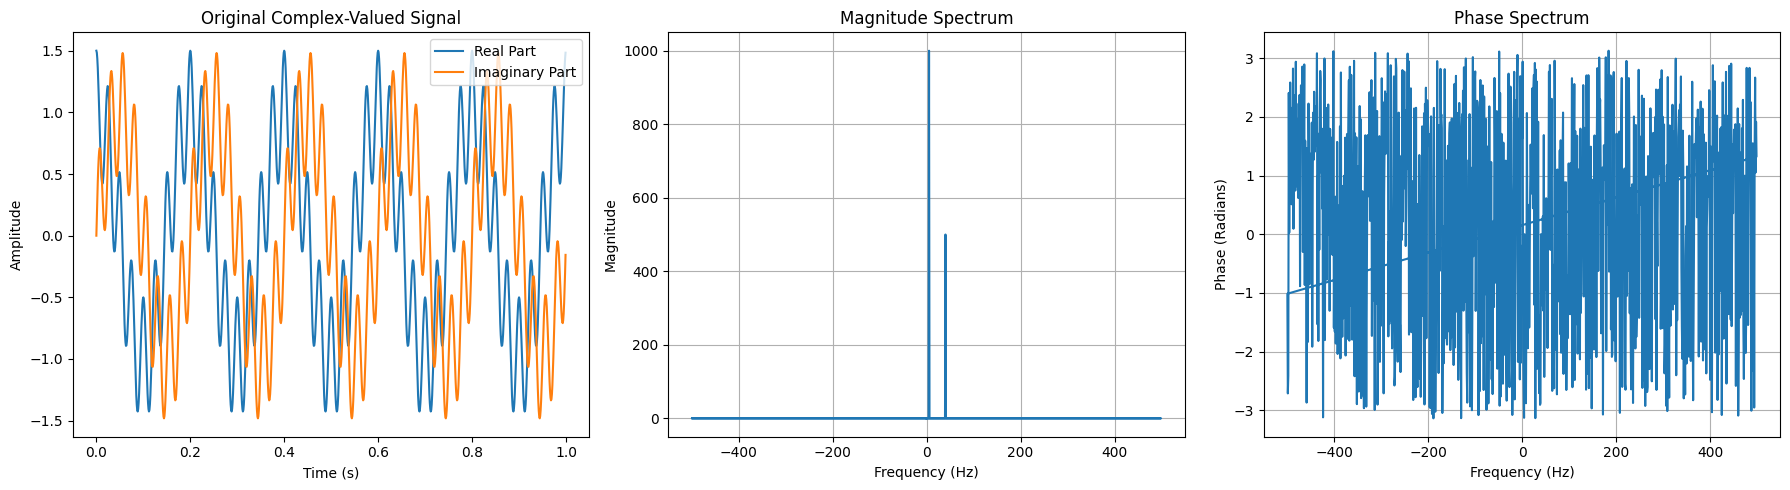

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a complex-valued signal
# Let's create a signal that is a sum of two complex exponentials
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector for 1 second
f1, f2 = 5, 40  # Frequencies of the components in Hz
signal = np.exp(1j * 2 * np.pi * f1 * t) + 0.5 * np.exp(1j * 2 * np.pi * f2 * t)

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Calculate magnitude and phase
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Plotting the original complex-valued signal along with its magnitude and phase spectra

plt.figure(figsize=(18, 5))

# Plot the original signal
plt.subplot(1, 3, 1)
plt.plot(t, signal.real, label='Real Part')
plt.plot(t, signal.imag, label='Imaginary Part')
plt.title('Original Complex-Valued Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the magnitude spectrum
plt.subplot(1, 3, 2)
plt.plot(frequencies, magnitude)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.xlim(0, 50)  # Limit frequency for better visibility
plt.grid(True)

# Plot the phase spectrum
plt.subplot(1, 3, 3)
plt.plot(frequencies, phase)
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (Radians)')
#plt.xlim(0, 50)  # Limit frequency for better visibility
plt.grid(True)

plt.tight_layout()
plt.show()



# PRIKLAD S VIACERYMI SINUSOIDAMI A NOISOM

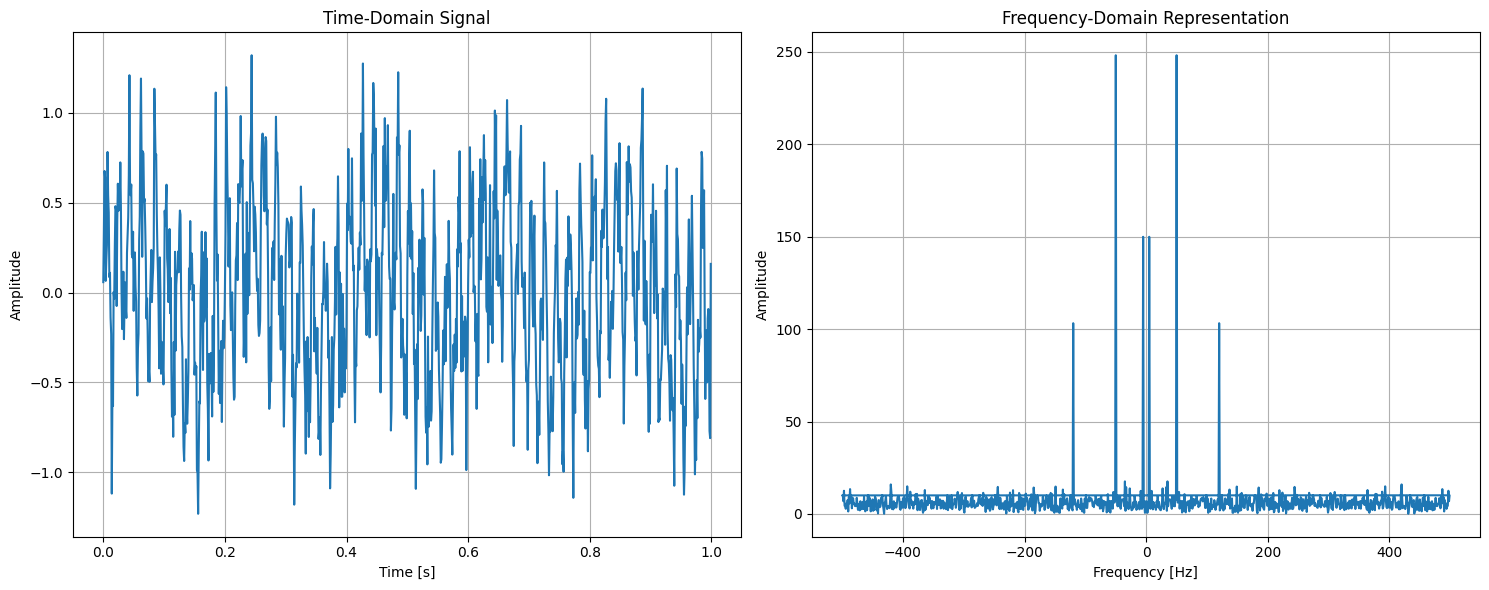

In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.fft import fft
import matplotlib.pyplot as plt
from scipy.fftpack import fftfreq

# Signal parameters
fs = 1000  # Sampling rate (samples per second)
T = 1.0    # Duration of the signal (seconds)
t = np.linspace(0, T, int(fs*T), endpoint=False)  # Time vector

# Frequencies of the sine waves
frequencies = [5, 50, 120]

# Generating the composite signal (sum of three sine waves with different frequencies and amplitudes)
signal = 0.3 * np.sin(2 * np.pi * frequencies[0] * t) + \
         0.5 * np.sin(2 * np.pi * frequencies[1] * t) + \
         0.2 * np.sin(2 * np.pi * frequencies[2] * t)

# Adding random noise
noise = np.random.normal(0, 0.2, signal.shape)
composite_signal = signal + noise

# Fourier Transform of the composite signal
composite_signal_fft = fft(composite_signal)
composite_signal_freq = fftfreq(int(fs*T), 1/fs)

# Plotting
plt.figure(figsize=(15, 6))

# Time-domain signal
plt.subplot(1, 2, 1)
plt.plot(t, composite_signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Frequency-domain representation
plt.subplot(1, 2, 2)
plt.plot(composite_signal_freq, np.abs(composite_signal_fft))
plt.title('Frequency-Domain Representation')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
#plt.xlim(0, 150)  # Limiting frequency range for better visibility

plt.tight_layout()
plt.show()


(0.0, 20.0)

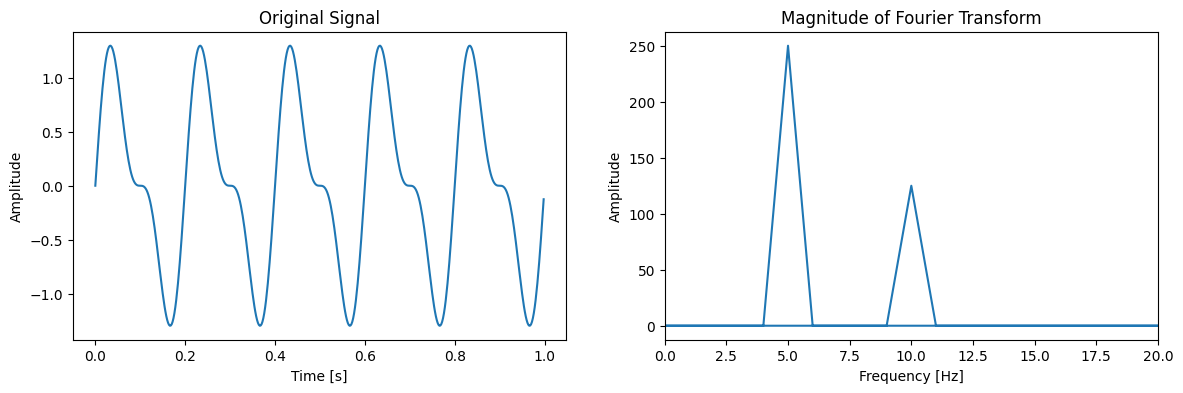

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Let's create a simple signal: a sum of two sine waves
t = np.linspace(0, 1, 500, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)

# Compute the Fourier Transform
frequencies = np.fft.fftfreq(len(t), d=t[1] - t[0])
fourier_transform = np.fft.fft(signal)

# Plot the original signal
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the magnitudes of the Fourier Transform
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.abs(fourier_transform))
plt.title('Magnitude of Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 20)  # Limit frequency to 20 Hz for better visibility



In [2]:
np.abs(fourier_transform)

array([3.87326339e-14, 4.92471285e-14, 1.32363922e-13, 1.27382853e-13,
       1.58773876e-14, 2.50000000e+02, 5.99352653e-14, 1.08143286e-14,
       2.68192039e-14, 3.04252790e-14, 1.25000000e+02, 5.77995576e-14,
       4.47060764e-14, 6.33197534e-14, 3.30937003e-14, 3.31101175e-14,
       3.13045834e-14, 4.73950942e-14, 6.86911732e-14, 1.67939142e-14,
       4.65300914e-14, 3.02440913e-14, 3.85654645e-15, 4.15295711e-14,
       1.31891119e-14, 4.84105643e-14, 1.14905478e-14, 1.75714083e-14,
       1.96338197e-14, 5.91938300e-15, 2.07992874e-14, 1.65662803e-14,
       1.56272600e-14, 2.30375503e-14, 2.81124391e-15, 2.22368530e-14,
       1.51638477e-14, 2.15777596e-14, 1.45444787e-14, 1.58916571e-14,
       1.88792729e-14, 1.69948344e-14, 2.36808509e-14, 1.03058079e-14,
       1.66756851e-14, 1.74812902e-14, 4.16495804e-15, 4.82417679e-14,
       6.65774840e-14, 4.21903492e-14, 1.21860785e-14, 1.48891934e-14,
       5.08073131e-14, 7.62488091e-14, 3.02374614e-14, 2.24254627e-14,
      

# ROTACIA 2D BODU POMOCOU e^ix

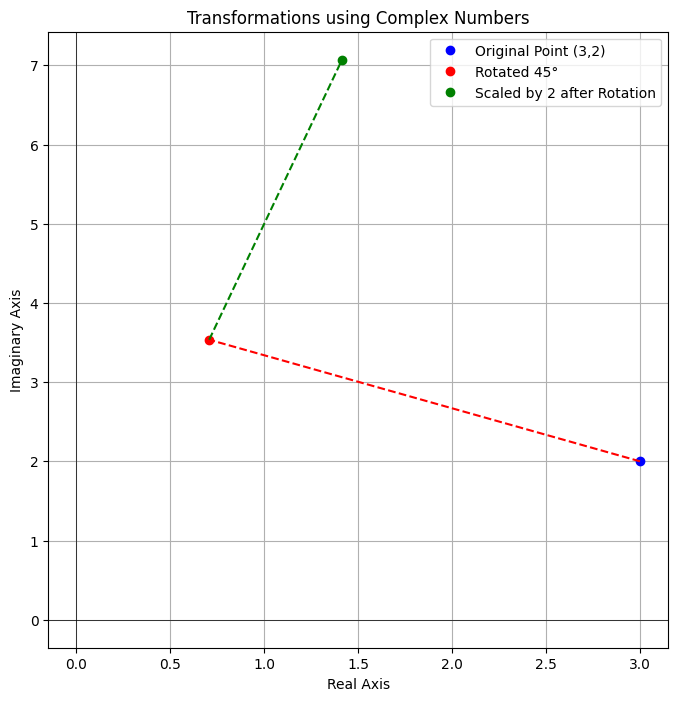

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Original point represented as a complex number
original_point = 3 + 2j

# Rotation: 45 degrees (pi/4 radians)
theta = np.pi / 4
rotation_factor = cmath.exp(1j * theta)

# Scaling: factor of 2
scaling_factor = 2

# Applying the transformations
rotated_point = original_point * rotation_factor
scaled_rotated_point = rotated_point * scaling_factor

# Extracting the real and imaginary parts for visualization
original_x, original_y = original_point.real, original_point.imag
rotated_x, rotated_y = rotated_point.real, rotated_point.imag
scaled_rotated_x, scaled_rotated_y = scaled_rotated_point.real, scaled_rotated_point.imag

# Plotting the original, rotated, and scaled-rotated points for visualization
plt.figure(figsize=(8, 8))
plt.plot(original_x, original_y, 'bo', label='Original Point (3,2)')
plt.plot(rotated_x, rotated_y, 'ro', label='Rotated 45°')
plt.plot(scaled_rotated_x, scaled_rotated_y, 'go', label='Scaled by 2 after Rotation')

# Drawing lines to show the transformations
plt.plot([original_x, rotated_x], [original_y, rotated_y], 'r--')  # Original to rotated
plt.plot([rotated_x, scaled_rotated_x], [rotated_y, scaled_rotated_y], 'g--')  # Rotated to scaled-rotated

plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.title('Transformations using Complex Numbers')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()
